In [1]:
from shallownetwork import ShallowNetwork
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# List 5: Problem 2

Fit a shallow neural network with 2-4 hidden units to the supplied data.

Loading and preparing the data.

In [2]:
data = pd.read_csv('sin.dat', names=['X', 'Y', 'DY'], sep='\t')

In [3]:
data.head()

,X,Y,DY
0,0.125664,0.253336,0.098665
1,0.251327,0.281187,0.199361
2,0.376991,0.250813,0.124933
3,0.502655,0.677263,0.172386
4,0.628319,0.764359,0.119524


In [4]:
X = data.X.values.reshape(-1,1)
Y = data.Y.values.reshape(-1,1)
DY = data.DY.values.reshape(-1,1)

Let's define a function to initialize, train and visualize network. It takes parameters:
  1. Loss function
  1. Optimizer
  1. Epochs
  1. X
  1. Y
  1. DY
  1. Size of a batch
  1. Number of hidden units
  1. Learning rate
  1. verbose
  1. message_frequency

In [5]:
def train_and_visualize(loss, optimizer, epochs, X, Y, DY, batch_size, hidden_units, learning_rate,
                       verbose=True, message_frequency=1):
  network = ShallowNetwork(input_dim=1, hidden_dim=hidden_units, output_dim=1)
  network.compile(loss_name=loss, optimizer=optimizer)
  network.fit(X, Y, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate,
              verbose=verbose, message_frequency=message_frequency)
  plt.plot(X, network(X), label='Prediction', c='red')
  plt.errorbar(X, Y, yerr=DY, label='Ground truth', c='g', fmt='.k')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(f'Prediction for {loss} and {hidden_units} units.')
  plt.legend()
  plt.show()

We will use the Mean Square Error loss function and optimizing the network with Gradient Descent algorithm.

## 2 hidden units

Epoch: 1 Loss function: 0.2198745603988982
Epoch: 10001 Loss function: 0.05723839653261961
Epoch: 20001 Loss function: 0.01923864380717913
Epoch: 30001 Loss function: 0.013338523812733588
Epoch: 40001 Loss function: 0.012042141769923348
Epoch: 50001 Loss function: 0.011392006796484886
Epoch: 60001 Loss function: 0.010942699517628371
Epoch: 70001 Loss function: 0.01055897594041726
Epoch: 80001 Loss function: 0.010234380524895286
Epoch: 90001 Loss function: 0.009938266725285905
Final loss function: 0.009673184324083008


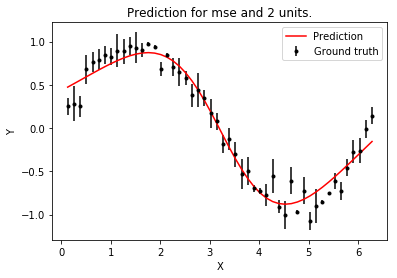

In [10]:
train_and_visualize(loss='mse', optimizer='GD', epochs=100000, X=X, Y=Y, DY=DY, batch_size=-1, hidden_units=2,
                   learning_rate=0.001, message_frequency=10000)

## 3 hidden units

Epoch: 1 Loss function: 0.43227611036432045
Final loss function: 0.0055870528966051524


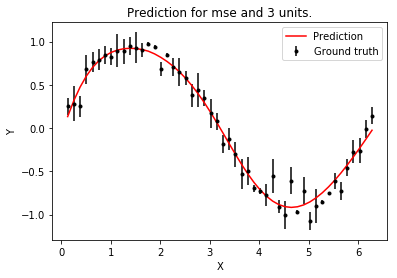

In [11]:
train_and_visualize(loss='mse', optimizer='GD', epochs=100000, X=X, Y=Y, DY=DY, batch_size=-1, hidden_units=3,
                   learning_rate=0.001, message_frequency=100000)

## 4 hidden units

Epoch: 1 Loss function: 0.38158170873781877
Final loss function: 0.0052927686420293964


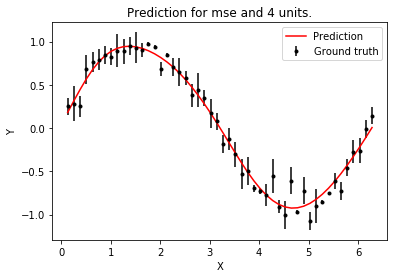

In [8]:
train_and_visualize(loss='mse', optimizer='GD', epochs=100000, X=X, Y=Y, DY=DY, batch_size=-1, hidden_units=4,
                   learning_rate=0.001, message_frequency=100000)

## Adagrad

Let's see how does adagrad optimizer work in this case.

Epoch: 1 Loss function: 1.255413966134231
Epoch: 10001 Loss function: 0.01450795981542651
Epoch: 20001 Loss function: 0.012426907191716867
Epoch: 30001 Loss function: 0.011384740374273622
Epoch: 40001 Loss function: 0.010699620285582407
Epoch: 50001 Loss function: 0.010171199665592094
Epoch: 60001 Loss function: 0.009740387649222623
Epoch: 70001 Loss function: 0.009394804455855924
Epoch: 80001 Loss function: 0.009109842630433122
Epoch: 90001 Loss function: 0.008869766132089825
Final loss function: 0.008663982713487563


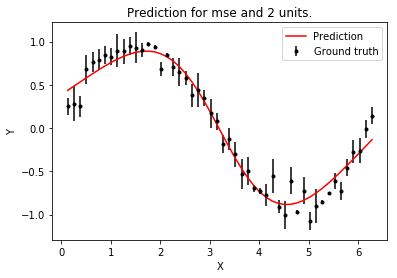

In [20]:
train_and_visualize(loss='mse', optimizer='Adagrad', epochs=100000, X=X, Y=Y, DY=DY, batch_size=-1, hidden_units=2,
                   learning_rate=0.1, message_frequency=10000)

The optimizer seems to work, but for this problem it requires more tries than the simple gradient descent.